# Matrices

In [3]:
# Matrix 2800K 

import numpy as np
import math

def antenna(size_factor,mu1,mu2,muRC,y1,y2,k12,kRC2,kcon,kdiss,ktrap): #!!put all terms you may change in brackets here and outside loop below
    hc = 1.98644568E-25 #energy carried by a single photon
    
    #calculated photon input rates
    Y1 = size_factor*y1
    Y2 = size_factor*y2
    

    #calculating transfer rate from 2 to 1
    delta_H12 = hc*((mu1-mu2)/(mu1*mu2)) #enthalpy change between compartment 1 and 2
    kboltz = 1.38E-23 #Boltzmann's constant (J/K)
    temp = 298 #room temperature in K
    Beta = 1/(kboltz*temp)
    n1 = 18 #no. of chlorophyll bs per LHCII trimer
    n2 = 24 #no. of chlorophyll as per LHCII trimer
    delta_S12 = kboltz*(np.log(n2/n1)) #entropy change between compartment 1 and 2
    delta_G12 = delta_H12 - (temp*delta_S12) #Gibb's free energy change between compartment 1 and 2
    invk21 = (1/k12)*(math.exp(-Beta*delta_G12)) 
    #print(invk21)
    k21 = 1/invk21
    #print(k21)

    #calculating transfer rate from 2 to RC
    delta_H2RC = hc*((mu2-muRC)/(mu2*muRC)) #enthalpy change between compartment 2 and RC
    nRC = 1 #no. of internal states in RC
    delta_S2RC = kboltz*(np.log(nRC/(size_factor*5*n2))) #entropy change between compartment 2 and RC (note there are ~5 LHCII trimers around a single RC)
    delta_G2RC = delta_H2RC - (temp*delta_S2RC) #Gibb's free energy change between compartment 2 and RC
    invk2RC = (1/kRC2)*(math.exp(Beta*delta_G2RC))
    #print('k2RC rate:', invk2RC*10**12, 'ps')
    k2RC = 1/invk2RC
    #print(k2RC)


    #at steady state equilibria 
    #square matrix
    A = np.array([[-(k12+kdiss),k21,0,0],
                  [k12,-(k21+k2RC+kdiss),kRC2,0],
                  [0,k2RC,-(kRC2+ktrap),0], 
                 [0,0,ktrap,-kcon]])

    #column vector u
    u = np.array([-Y1,-Y2,0,0])

    #inverse of the square matrix
    InvA = np.linalg.inv(A)
    Identity_Matrix = np.matmul(InvA, A) #should have 1s along the diagonal and rest is 0 #could also do InvA@A
    #print(np.rint(Identity_Matrix)) #rounds arrays terms to to closest integer to check


    #column vector v
    v = InvA@u
    
    #EQUILIBRIUM POPULATIONS FOR COMPARTMENTS 1, 2 and RC
    N1eq = v[0]
    N2eq = v[1]
    NRCeq = v[2]
    NENDeq = v[3]

    #equilibrium charge separation rate in RC
    VRCeq = kcon*NENDeq
   
    #reaction centre quantam yield 
    RCqy = VRCeq/(VRCeq+(kdiss*(N1eq+N2eq)))


    return(VRCeq,RCqy,N1eq,N2eq,NRCeq,NENDeq,k2RC)

################################################################################
# Parameters to go outside loop
################################################################################
mu1 = 650E-9 #peak wavelength of compartment 1 in SI units
mu2 = 675E-9 #peak wavelength of compartment 2 in SI units
muRC = 680E-9 #peak wavelength of RC in SI units
y1 = 3.616969238764809 #photon input rate for G1
y2 = 5.673786815285793 #photon input rate for G2
#estimated rate constants
k12 = (1/1)*10**12 #rate constant for energy transfer from compartment 1 to compartment 2 (in s-1)
kRC2 = (1/1)*10**12 #rate constant for energy transfer from RC to compartment 2
kcon = (1/10)*10**3 #rate constant for primary energy conversion in the RC (rate of photon-induced charge separation) (in s-1)
kdiss = (1/4)*10**9 #rate constant for background dissipation of excitation/decay rate of excited chlorophyll (in s-1)
ktrap = (1/5)*10**12 #rate at which the exciton located on the P680 ‘special pair’ is converted into the P680+-PheoA- radical pair

Vend_array=[]
RC_qy_array=[]
Neq_array=[]
k2RC_array=[]
size_factor_array = [1,1.05,1.1,1.2,1.4,1.6,1.8,2,2.5,3,4,5,10,25,50,100,250,500,1000,5000,10000]
for size_factor in size_factor_array:
    solution=antenna(size_factor,mu1,mu2,muRC,y1,y2,k12,kRC2,kcon,kdiss,ktrap)
    #Output order is (VRCeq,RCqy,N1eq,N2eq,NRCeq,NENDeq,k2RC)
    Vend_array.append(solution[0])
    RC_qy_array.append(solution[1])
    Neq_array.append([solution[2],solution[3],solution[4],solution[5]])
    k2RC_array.append(solution[6])

#print(Neq_array)
#print(RC_qy_array)

In [2]:
# Matrix 3300K 

def antenna3300(size_factor,mu1,mu2,muRC,y1_3300,y2_3300,k12,kRC2,kcon,kdiss,ktrap): #!!put all terms you may change in brackets here and outside loop below
    hc = 1.98644568E-25 #energy carried by a single photon
    
    #calculated photon input rates
    Y1_3300 = size_factor*y1_3300
    Y2_3300 = size_factor*y2_3300
    
    #calculating transfer rate from 2 to 1
    delta_H12 = hc*((mu1-mu2)/(mu1*mu2)) #enthalpy change between compartment 1 and 2
    kboltz = 1.38E-23 #Boltzmann's constant (J/K)
    temp = 298 #room temperature in K
    Beta = 1/(kboltz*temp)
    n1 = 18 #no. of chlorophyll bs per LHCII trimer
    n2 = 24 #no. of chlorophyll as per LHCII trimer
    delta_S12 = kboltz*(np.log(size_factor*n2/n1)) #entropy change between compartment 1 and 2
    delta_G12 = delta_H12 - (temp*delta_S12) #Gibb's free energy change between compartment 1 and 2
    invk21 = (1/k12)*(math.exp(-Beta*delta_G12)) 
    #print(invk21)
    k21 = 1/invk21
    #print(k21)

    #calculating transfer rate from 2 to RC
    delta_H2RC = hc*((mu2-muRC)/(mu2*muRC)) #enthalpy change between compartment 2 and RC
    nRC = 1 #no. of internal states in RC
    delta_S2RC = kboltz*(np.log(nRC/(size_factor*5*n2))) #entropy change between compartment 2 and RC (note there are ~5 LHCII trimers around a single RC)
    delta_G2RC = delta_H2RC - (temp*delta_S2RC) #Gibb's free energy change between compartment 2 and RC
    invk2RC = (1/kRC2)*(math.exp(Beta*delta_G2RC))
    #print('k2RC rate:', invk2RC*10**12, 'ps')
    k2RC = 1/invk2RC
    #print(k2RC)


    #at steady state equilibria 
    #square matrix
    A = np.array([[-(k12+kdiss),k21,0,0],
                  [k12,-(k21+k2RC+kdiss),kRC2,0],
                  [0,k2RC,-(kRC2+ktrap),0], 
                 [0,0,ktrap,-kcon]])

    #column vector u
    u = np.array([-Y1_3300,-Y2_3300,0,0])

    #inverse of the square matrix
    InvA = np.linalg.inv(A)
    Identity_Matrix = np.matmul(InvA, A) #should have 1s along the diagonal and rest is 0 #could also do InvA@A
    #print(np.rint(Identity_Matrix)) #rounds arrays terms to to closest integer to check


    #column vector v
    v = InvA@u
    
    
    #EQUILIBRIUM POPULATIONS FOR COMPARTMENTS 1, 2 and RC
    N1eq = v[0]
    N2eq = v[1]
    NRCeq = v[2]
    NENDeq = v[3]

    #equilibrium charge separation rate in RC
    VRCeq = kcon*NENDeq
   
    #reaction centre quantam yield 
    RCqy = VRCeq/(VRCeq+(kdiss*(N1eq+N2eq)))

    return(VRCeq,RCqy,N1eq,N2eq,NRCeq,NENDeq,k2RC)


################################################################################
# Parameters to go outside loop
################################################################################
mu1 = 650E-9 #peak wavelength of compartment 1 in SI units
mu2 = 675E-9 #peak wavelength of compartment 2 in SI units
muRC = 680E-9 #peak wavelength of RC in SI units
y1_3300 = 13.593522867647904 #photon input rate for G1
y2_3300 = 22.482108680244856 #photon input rate for G2
#estimated rate constants
k12 = (1/1)*10**12 #rate constant for energy transfer from compartment 1 to compartment 2 (in s-1)
kRC2 = (1/1)*10**12 #rate constant for energy transfer from RC to compartment 2
kcon = (1/10)*10**3 #rate constant for primary energy conversion in the RC (rate of photon-induced charge separation) (in s-1)
kdiss = (1/4)*10**9 #rate constant for background dissipation of excitation/decay rate of excited chlorophyll (in s-1)
ktrap = (1/5)*10**12 #rate at which the exciton located on the P680 ‘special pair’ is converted into the P680+-PheoA- radical pair

Vend_array_3300=[]
RC_qy_array_3300=[]
Neq_array_3300=[]
k2RC_array_3300=[]
size_factor_array = [1,1.05,1.1,1.2,1.4,1.6,1.8,2,2.5,3,4,5,10,25,50,100,250,500,1000,5000,10000]
for size_factor in size_factor_array:
    solution=antenna3300(size_factor,mu1,mu2,muRC,y1_3300,y2_3300,k12,kRC2,kcon,kdiss,ktrap)
    #Output order is (VRCeq,RCqy,N1eq,N2eq,NRCeq,NENDeq,k2RC)
    Vend_array_3300.append(solution[0])
    RC_qy_array_3300.append(solution[1])
    Neq_array_3300.append([solution[2],solution[3],solution[4],solution[5]])
    k2RC_array_3300.append(solution[6])

#print(Vend_array_3300)
#print(RC_qy_array_3300)
#print(Neq_array_3300[10])#at the 10th size factor, NENDeq is > 1 (unphysical)
#print(size_factor_array[5:11])
#print(Vend_array_3300[5:11])

[1.6, 1.8, 2, 2.5, 3, 4]
[49.10910092911791, 54.265591184501204, 59.241948287789384, 70.95411003066147, 81.72556588645725, 100.86599329987986]


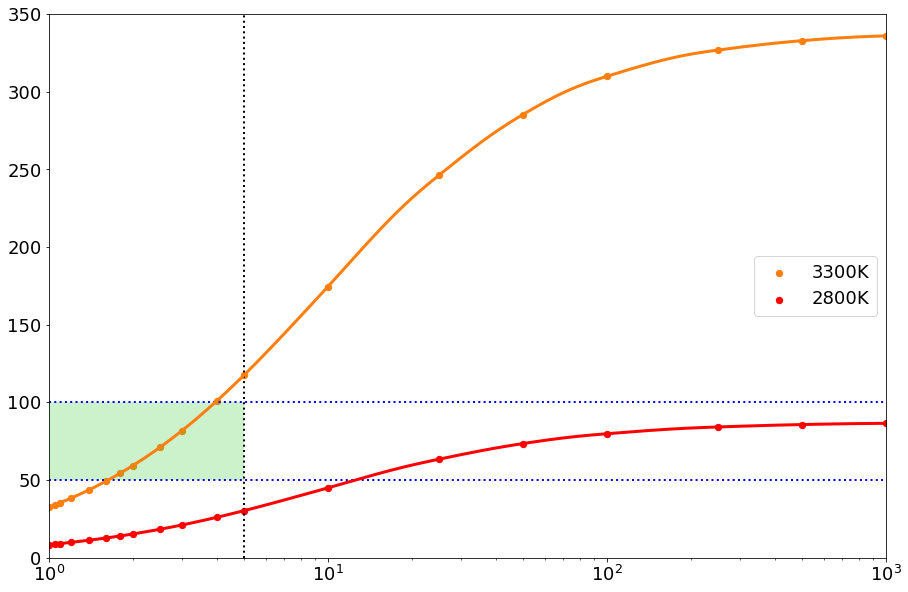

In [5]:
import matplotlib.pyplot as plt #import plt function from matplotlib library
import numpy as np 
from numpy import trapz
from matplotlib.ticker import (MultipleLocator, #major/minor ticks
           FormatStrFormatter, AutoMinorLocator)
import math
import matplotlib.patches as mpatches #allows shapes to be drawn
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset) #allows inset graphs to be drawn


fig, ax = plt.subplots(figsize=(15, 10))
#ax.set_title('Equilibrium charge separation rate as a function of antenna size', fontsize=20) 
#ax.set_ylabel('Equilibrium charge separation rate ($quanta s^{-1}$)', fontsize=16)
#ax.set_xlabel('Antenna Size Factor', fontsize=16) 

ax.scatter(size_factor_array,Vend_array_3300,marker='o',color='tab:orange',label='3300K',s=40)
ax.scatter(size_factor_array,Vend_array,marker='o',color='r',label='2800K',s=40)
ax.axhline(y=50, color='b', linestyle='dotted',linewidth=2) 
ax.axhline(y=100, color='b', linestyle='dotted',linewidth=2) 
ax.axvline(x=5, color='k', linestyle='dotted',linewidth=2) 

#draw rectangle (left,bottom coordinate), width, height
rect=mpatches.Rectangle((1,50),4,50, #fill = False,
                        facecolor = "limegreen", alpha = 0.25)
plt.gca().add_patch(rect)

#interpolate 
from scipy.interpolate import interp1d #1 dimensional interpolation
y_f = interp1d(size_factor_array,Vend_array,'cubic')
y2_f = interp1d(size_factor_array,Vend_array_3300,'cubic')
x = np.linspace(1,1000,5000) #start,end,number of interpolated points
x2 = np.linspace(1,1000,5000)
y = y_f(x)
y2 = y2_f(x2)

ax.plot(x,y,color='r',linestyle='solid',linewidth=3)
ax.plot(x2,y2,color='tab:orange',linestyle='solid',linewidth=3)

#inset plots article https://scipython.com/blog/inset-plots-in-matplotlib/ 

ax.set_xscale('log')
ax.set_xlim(1, 1000)
ax.set_ylim(0,350)
ax.yaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_major_formatter(FormatStrFormatter('%1.0f'))
ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)

ax.legend(loc=5,prop={'size':18})
plt.savefig('Veq_sizefactor.png')
plt.show() 

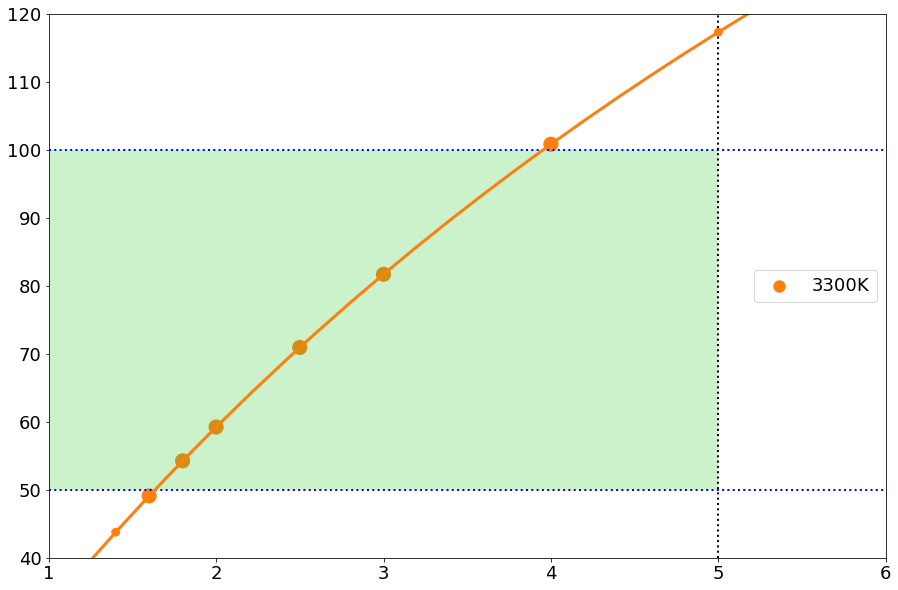

21


In [6]:
#ZOOMED IN

fig, ax = plt.subplots(figsize=(15, 10))

s = [60,60,60,60,60,200,200,200,200,200,200,60,60,60,60,60,60,60,60,60,60]
ax.scatter(size_factor_array,Vend_array_3300,marker='o',color='tab:orange',label='3300K',s=s)
ax.axhline(y=50, color='b', linestyle='dotted',linewidth=2) 
ax.axhline(y=100, color='b', linestyle='dotted',linewidth=2) 
ax.axvline(x=5, color='k', linestyle='dotted',linewidth=2) 

#draw rectangle (left,bottom coordinate), width, height
rect=mpatches.Rectangle((1,50),4,50, #fill = False,
                        facecolor = "limegreen", alpha = 0.25)
plt.gca().add_patch(rect)

#interpolate 
from scipy.interpolate import interp1d #1 dimensional interpolation
y_f = interp1d(size_factor_array,Vend_array_3300,'cubic')
x = np.linspace(1,10,1000) #start,end,number of interpolated points
y = y_f(x)

ax.plot(x2,y2,color='tab:orange',linestyle='solid',linewidth=3)

#ax.set_xscale('log')
ax.set_xlim(1, 6)
ax.set_ylim(40,120)
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_major_formatter(FormatStrFormatter('%1.0f'))
ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)

ax.legend(loc=5,prop={'size':18})
plt.savefig('Veq_sizefactor_zoom.pdf') ###KEY!!! ALWAYS PUT THIS BEFORE plt.show() or you get a blank pdf.
plt.savefig('Veq_sizefacto_zoom.png')
plt.show()
print(len(size_factor_array))

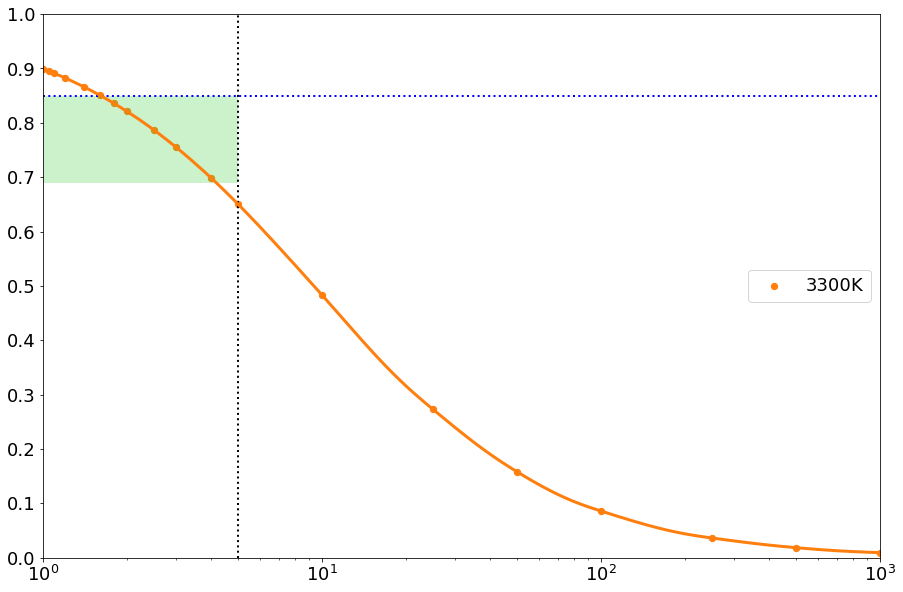

[0.8508011298416629, 0.8356763101439616, 0.8210798501079838, 0.7867261859182139, 0.7551317642026701, 0.6989897956878003]


In [7]:
import matplotlib.pyplot as plt #import plt function from matplotlib library
import numpy as np 
from numpy import trapz
from matplotlib.ticker import (MultipleLocator, #major/minor ticks
           FormatStrFormatter, AutoMinorLocator)
import math

fig, ax = plt.subplots(figsize=(15, 10))
#ax.set_title('Quantam yield as a function of antenna size', fontsize=20) 
#ax.set_ylabel('Quantam yield (%)', fontsize=16)
#ax.set_xlabel('Antenna Size Factor', fontsize=16) 

ax.scatter(size_factor_array,RC_qy_array_3300,marker='o',color='tab:orange',label='3300K',s=40)
ax.axhline(y=0.85, color='b', linestyle='dotted',linewidth=2) 
ax.axvline(x=5, color='k', linestyle='dotted',linewidth=2) 

#draw rectangle (left,bottom coordinate), width, height
rect=mpatches.Rectangle((1,0.69),4,0.16, #fill = False,
                        facecolor = "limegreen", alpha = 0.25)
plt.gca().add_patch(rect)

#interpolate 
from scipy.interpolate import interp1d #1 dimensional interpolation
y_f = interp1d(size_factor_array,RC_qy_array_3300,'cubic')
x = np.linspace(1,1000,5000) #start,end,number of interpolated points
y = y_f(x)

ax.plot(x,y,color='tab:orange',linestyle='solid',linewidth=3)

ax.set_xscale('log')
ax.set_xlim(1, 1000)
ax.set_ylim(0,1)
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)

ax.legend(loc=5,prop={'size':18})
plt.savefig('Quantamyield_sizefactor.pdf') ###KEY!!! ALWAYS PUT THIS BEFORE plt.show() or you get a blank pdf.
plt.savefig('Quantamyield_sizefactor.png')
plt.show() 
print(RC_qy_array_3300[5:11])

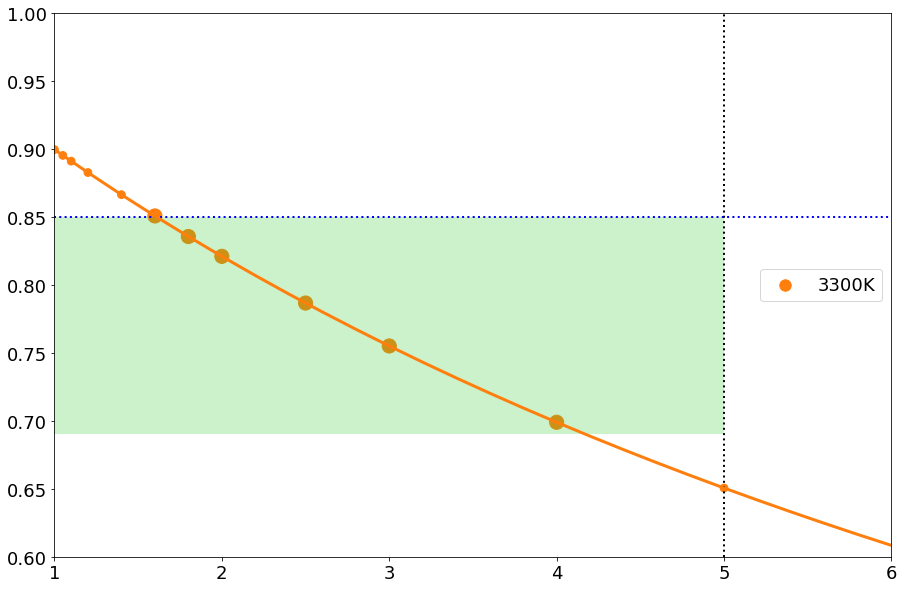

In [8]:
#ZOOMED IN

fig, ax = plt.subplots(figsize=(15, 10))

s = [60,60,60,60,60,200,200,200,200,200,200,60,60,60,60,60,60,60,60,60,60]
ax.scatter(size_factor_array,RC_qy_array_3300,marker='o',color='tab:orange',label='3300K',s=s)
ax.axhline(y=0.85, color='b', linestyle='dotted',linewidth=2) 
ax.axvline(x=5, color='k', linestyle='dotted',linewidth=2) 

#draw rectangle (left,bottom coordinate), width, height
rect=mpatches.Rectangle((1,0.69),4,0.16, #fill = False,
                        facecolor = "limegreen", alpha = 0.25)
plt.gca().add_patch(rect)

#interpolate 
from scipy.interpolate import interp1d #1 dimensional interpolation
y_f = interp1d(size_factor_array,RC_qy_array_3300,'cubic')
x = np.linspace(1,1000,5000) #start,end,number of interpolated points
y = y_f(x)

ax.plot(x,y,color='tab:orange',linestyle='solid',linewidth=3)

#ax.set_xscale('log')
ax.set_xlim(1, 6)
ax.set_ylim(0.6,1.0)
ax.yaxis.set_major_locator(MultipleLocator(0.05))
ax.yaxis.set_major_formatter(FormatStrFormatter('%0.2f'))
ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)

ax.legend(loc=5,prop={'size':18})
plt.savefig('Quantamyield_sizefactor_zoom.pdf') ###KEY!!! ALWAYS PUT THIS BEFORE plt.show() or you get a blank pdf.
plt.savefig('Quantamyield_sizefactor_zoom.png')
plt.show() 